<a href="https://colab.research.google.com/github/Chri1629/dsim_project/blob/main/image_retrieval/retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

## Import librerie

Per prima cosa importiamo tutte le librerie che saranno necessarie all'esecuzione del codice.

In [104]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing import image as kimage
from tensorflow.keras.applications import xception, resnet50, mobilenet
import tarfile
from shutil import copyfile
from time import time
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KDTree
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Data loader

Definiamo il data loader in modo che vada a creare le feature per ogni immagine presente all'interno del nostro dataset.

In [ ]:
net = xception.Xception(include_top = False, weights = 'imagenet', pooling = 'max', input_shape = (224,224,3))

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
maximages = 500

# Dummy feature
def identity(image):
    return kimage.img_to_array(img).flatten()

# Data loader
def load_data(feature_extractor=identity):
    base_path = "gdrive/MyDrive/ambulanze/"

    paths = []
    features = []

    for fi,f in enumerate(sorted(os.listdir(base_path))):
        if f.endswith('.jpg') and fi<maximages:
            # Save file path
            cur_path = base_path + f
            paths.append(cur_path)
            
            # Load file and extract features
            image = kimage.load_img(cur_path, target_size=(224, 224))
            cur_features = feature_extractor(image)
            features.append(cur_features)

    features = np.array(features)
    return features, paths

In [ ]:
def xception_features(img):
  x = kimage.img_to_array(img)
  x = xception.preprocess_input(x)
  x = np.expand_dims(x, axis = 0)
  f = net.predict(x)
  return f.flatten()

In [ ]:
def mobilenet_features(img):
  x = kimage.img_to_array(img)
  x = mobilenet.preprocess_input(x)
  x = np.expand_dims(x, axis = 0)
  f = net.predict(x)
  return f.flatten()

In [ ]:
def resnet_features(img):
  x = kimage.img_to_array(img)
  x = resnet50.preprocess_input(x)
  x = np.expand_dims(x, axis = 0)
  f = net.predict(x)
  return f.flatten()

In [ ]:
X_train, paths = load_data(feature_extractor = xception_features)

In [ ]:
X_train.shape

(500, 2048)

Come si può notare tutte le immagini sono state importate in maniera corretta e a tutte sono state aggiunte le corrispettive feature. Ottimizziamo ora la ricerca dell'immagine di query usando KDTree.

In [ ]:
tree = KDTree(X_train)

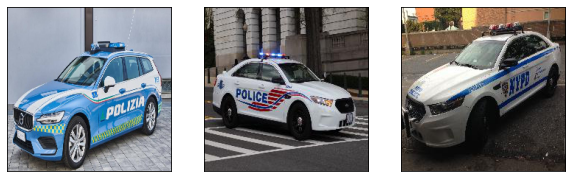

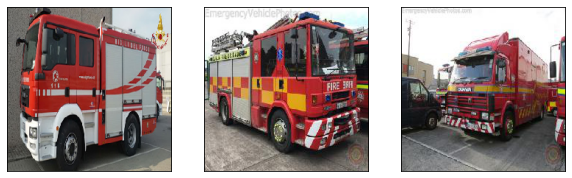

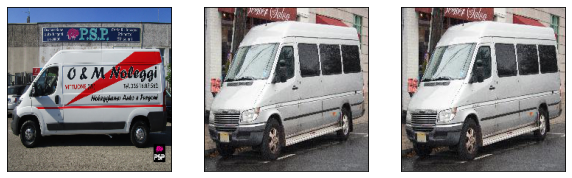

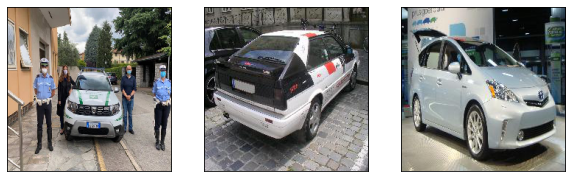

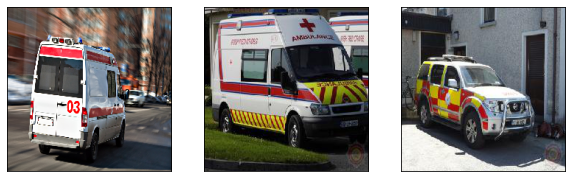

In [103]:
immagini = ['polizia', 'VVF', 'tosta','prova3','prova']

for i, immagine in enumerate(immagini):
  query_image = kimage.load_img('gdrive/MyDrive/single/test/{}.jpg'.format(immagine), target_size = (224,224))
  query_features = neural_features(query_image)
  query_features = np.expand_dims(query_features, axis = 0)
  dist, ind = tree.query(query_features, k = 2)
  result_1 = kimage.load_img(paths[ind[0][0]])
  result_2 = kimage.load_img(paths[ind[0][1]])

  plt.figure(i+1,figsize = (10,10))
  plt.subplot(1,3,1)
  plt.imshow(query_image)
  plt.tick_params(axis='both', which='both', bottom=False, top=False, left = False,
                  right = False, labelbottom=False, labelleft=False)
  plt.subplot(1,3,2)
  plt.imshow(result_1)
  plt.tick_params(axis='both', which='both', bottom=False, top=False, left = False,
                  right = False, labelbottom=False, labelleft=False)
  plt.subplot(1,3,3)
  plt.imshow(result_2)
  plt.tick_params(axis='both', which='both', bottom=False, top=False, left = False,
                  right = False, labelbottom=False, labelleft=False)